In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pyflct

In [2]:
from matplotlib import font_manager

font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
from astropy.io import fits

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter

In [5]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [6]:
# Let us load the FLCT derived velocities for all given combinations, starting with 1200km
Vx_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data
Vy_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data

In [7]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [8]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [9]:
Vx_100 = fits.open("pyFLCT_fwhm_100_dt_30_Inte_tracked.fits")[0].data
Vy_100 = fits.open("pyFLCT_fwhm_100_dt_30_Inte_tracked.fits")[1].data

In [10]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [11]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 90)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 90)
Vy_mean_sim90 = Vy_mean_sim90/1E5

In [12]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim90, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim90, 22.5, mode = "wrap")

In [13]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim90, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim90, 11.25, mode = "wrap")

In [15]:
Vx_filtered35 = gaussian_filter(Vx_mean_sim90, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_mean_sim90, 35, mode = "wrap")

In [16]:
Vx_filtered3 = gaussian_filter(Vx_mean_sim90, 3.75, mode = "wrap")
Vy_filtered3 = gaussian_filter(Vy_mean_sim90, 3.75, mode = "wrap")

In [17]:
from scipy.stats import linregress

In [19]:
Vx_FLCT_1200 = temporal_avg(Vx_1200, 0, 90)
Vy_FLCT_1200 = temporal_avg(Vy_1200, 0, 90)

In [20]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 90)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 90)

In [21]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 90)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 90)

In [22]:
Vx_FLCT_100 = temporal_avg(Vx_100, 0, 90)
Vy_FLCT_100 = temporal_avg(Vy_100, 0, 90)

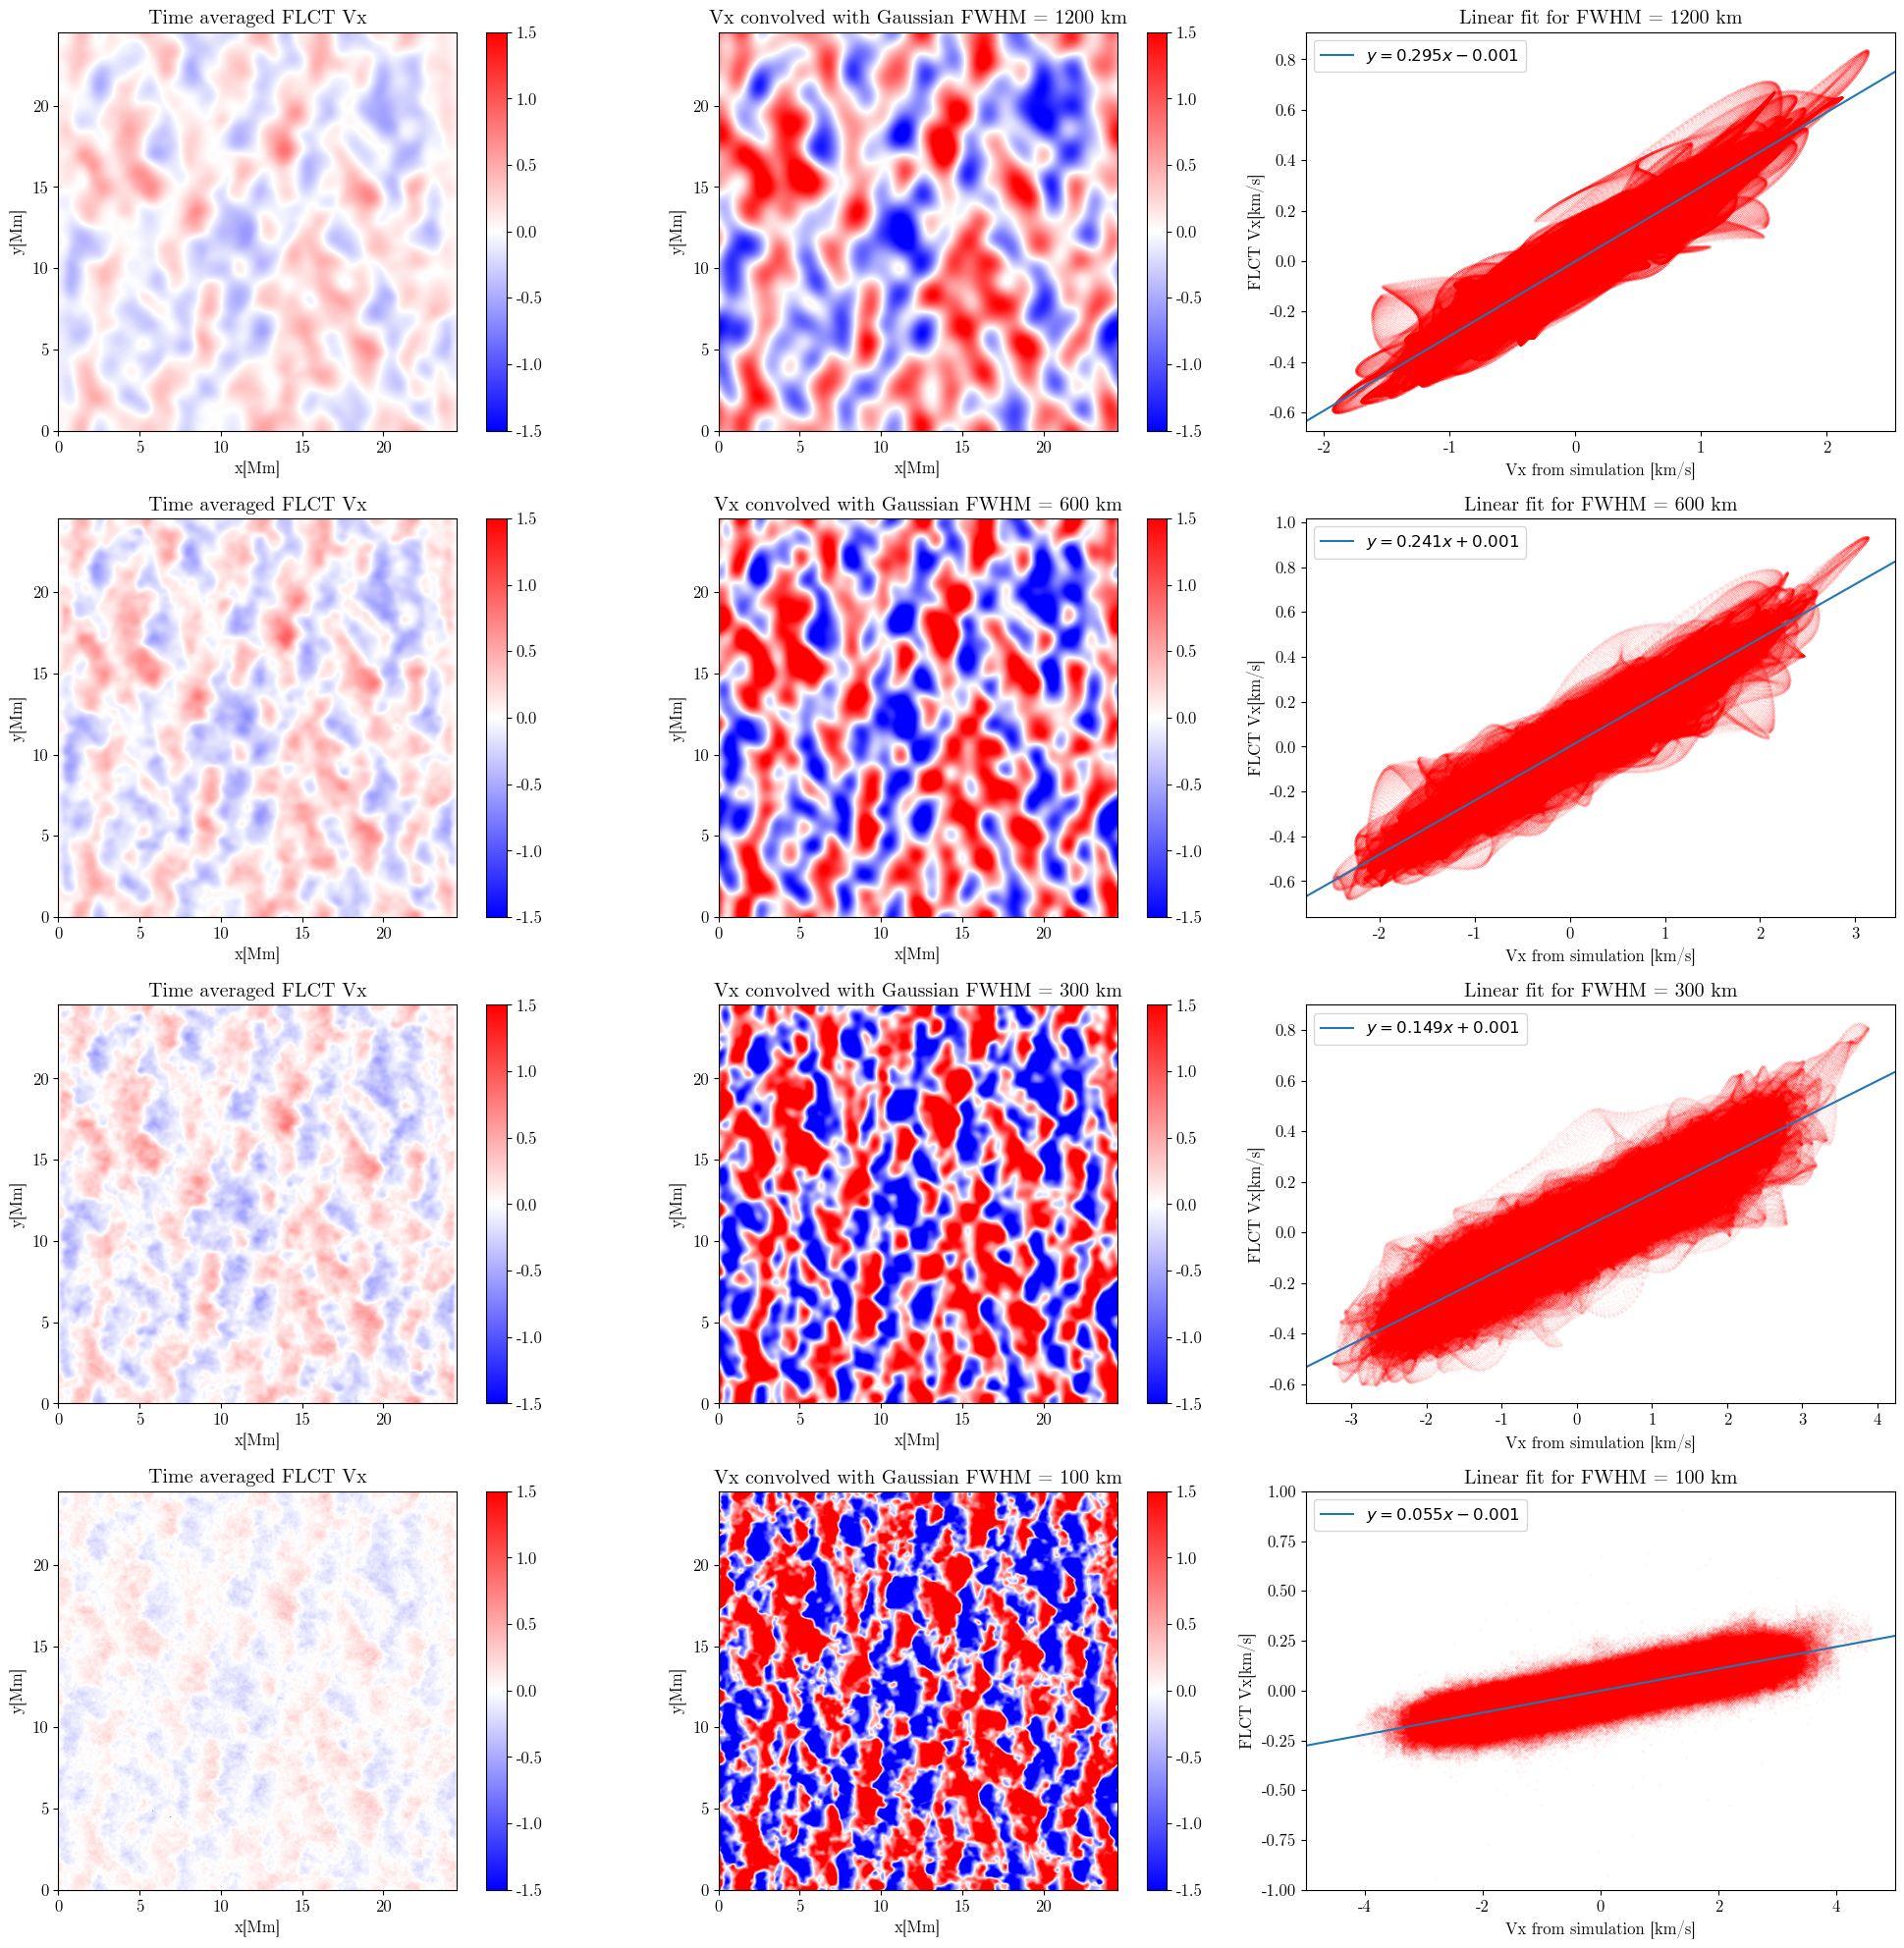

In [24]:
fig = plt.figure(figsize = (20,20))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
ax1 = plt.subplot2grid((4,3), (0,0))
ax1.set_title("Time averaged FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_FLCT_1200[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

ax2 = plt.subplot2grid((4,3), (0,1))
ax2.set_title("Vx convolved with Gaussian FWHM = 1200 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

ax3 = plt.subplot2grid((4,3), (0,2))
ax3.set_title("Linear fit for FWHM = 1200 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx_filtered35.flatten(), Vx_FLCT_1200.flatten(), s = 0.001, color="red")
m1, b1, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_1200.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
plt.legend()

ax4 = plt.subplot2grid((4,3), (1,0))
ax4.set_title("Time averaged FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_FLCT_600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

ax5 = plt.subplot2grid((4,3), (1,1))
ax5.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

ax6 = plt.subplot2grid((4,3), (1,2))
ax6.set_title("Linear fit for FWHM = 600 km")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.scatter(Vx_filtered22.flatten(), Vx_FLCT_600.flatten(), s = 0.001, color="red")
m2, b2, *_ = linregress(Vx_filtered22.flatten(), Vx_FLCT_600.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'$y = {m2:.3f}x {b2:+.3f}$')
plt.legend()

ax7 = plt.subplot2grid((4,3), (2,0))
ax7.set_title("Time averaged FLCT Vx")
ax7.set_xlabel("x[Mm]")
ax7.set_ylabel("y[Mm]")
im7 = ax7.imshow(Vx_FLCT_300[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im7)

ax8 = plt.subplot2grid((4,3), (2,1))
ax8.set_title("Vx convolved with Gaussian FWHM = 300 km")
ax8.set_xlabel("x[Mm]")
ax8.set_ylabel("y[Mm]")
im8 = ax8.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im8)

ax9 = plt.subplot2grid((4,3), (2,2))
ax9.set_title("Linear fit for FWHM = 300 km")                                
ax9.set_ylabel("FLCT Vx[km/s]")
ax9.set_xlabel("Vx from simulation [km/s]")
ax9.scatter(Vx_filtered11.flatten(), Vx_FLCT_300.flatten(), s = 0.001, color="red")
m3, b3, *_ = linregress(Vx_filtered11.flatten(), Vx_FLCT_300.flatten())
ax9.axline(xy1=(0, b3), slope=m3, label=f'$y = {m3:.3f}x {b2:+.3f}$')
plt.legend()

ax10 = plt.subplot2grid((4,3), (3,0))
ax10.set_title("Time averaged FLCT Vx")
ax10.set_xlabel("x[Mm]")
ax10.set_ylabel("y[Mm]")
im10 = ax10.imshow(Vx_FLCT_100[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im10)

ax11 = plt.subplot2grid((4,3), (3,1))
ax11.set_title("Vx convolved with Gaussian FWHM = 100 km")
ax11.set_xlabel("x[Mm]")
ax11.set_ylabel("y[Mm]")
im11 = ax11.imshow(Vx_filtered3[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im11)

ax12 = plt.subplot2grid((4,3), (3,2))
ax12.set_title("Linear fit for FWHM = 100 km")                                
ax12.set_ylabel("FLCT Vx[km/s]")
ax12.set_xlabel("Vx from simulation [km/s]")
ax12.set_xlim(-5,5)
ax12.set_ylim(-1,1)
ax12.scatter(Vx_filtered3.flatten(), Vx_FLCT_100.flatten(), s = 0.001, color="red")
m4, b4, *_ = linregress(Vx_filtered3.flatten(), Vx_FLCT_100.flatten())
ax12.axline(xy1=(0, b4), slope=m4, label=f'$y = {m4:.3f}x {b4:+.3f}$')
plt.legend()

fig.tight_layout()
plt.savefig("November_Intensity.png", dpi = 300)

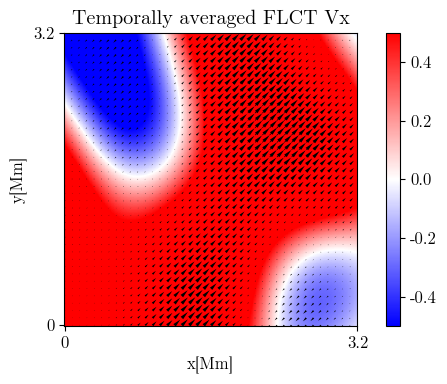

In [29]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
#im1 = ax1.imshow(Vx_FLCT_1200[0:64, 0:64], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Temporally averaged FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")

xmin = 0
xmax = 200
ymin = 0
ymax=  200

Bgtx_disp = Vx_FLCT_1200[ymin:ymax,xmin:xmax]
Bgty_disp = Vx_FLCT_1200[ymin:ymax,xmin:xmax]
Bgtz_disp = Vx_filtered35[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 5


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))

xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))
im1 = ax1.imshow(Bgtz_disp, origin='lower',cmap='bwr', vmin = -0.5, vmax = 0.5)
ax1.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 5, headaxislength = 12, headlength = 12)
plt.xticks([0,200], [0, 2*1.6])
plt.yticks([0,200], [0, 2*1.6])
fig.colorbar(im1)


fig.tight_layout()
plt.savefig("QuiverxIntepng", bbox_inches = 'tight', dpi = 125)

<h2>Magnetic field</h2>

In [30]:
Vx_Bz1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Bz_tracked.fits")[0].data
Vy_Bz1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Bz_tracked.fits")[1].data

In [31]:
Vx_Bz600 = fits.open("pyFLCT_fwhm_600_dt_30_Bz_tracked.fits")[0].data
Vy_Bz600 = fits.open("pyFLCT_fwhm_600_dt_30_Bz_tracked.fits")[1].data

In [32]:
Vx_Bz300 = fits.open("pyFLCT_fwhm_300_dt_30_Bz_tracked.fits")[0].data
Vy_Bz300 = fits.open("pyFLCT_fwhm_300_dt_30_Bz_tracked.fits")[1].data

In [33]:
Vx_Bz100 = fits.open("pyFLCT_fwhm_100_dt_30_Bz_tracked.fits")[0].data
Vy_Bz100 = fits.open("pyFLCT_fwhm_100_dt_30_Bz_tracked.fits")[1].data

In [34]:
Vx_FLCT_Bz1200 = temporal_avg(Vx_Bz1200, 0, 90)
Vy_FLCT_Bz1200 = temporal_avg(Vy_Bz1200, 0, 90)

In [35]:
Vx_FLCT_Bz600 = temporal_avg(Vx_Bz600, 0, 90)
Vy_FLCT_Bz600 = temporal_avg(Vy_Bz600, 0, 90)

In [36]:
Vx_FLCT_Bz300 = temporal_avg(Vx_Bz300, 0, 90)
Vy_FLCT_Bz300 = temporal_avg(Vy_Bz300, 0, 90)

In [37]:
Vx_FLCT_Bz100 = temporal_avg(Vx_Bz100, 0, 90)
Vy_FLCT_Bz100 = temporal_avg(Vy_Bz100, 0, 90)

/tmp/ipykernel_5466/2771047705.py:102: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_5466/2771047705.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("November_Bz.png", dpi = 300)


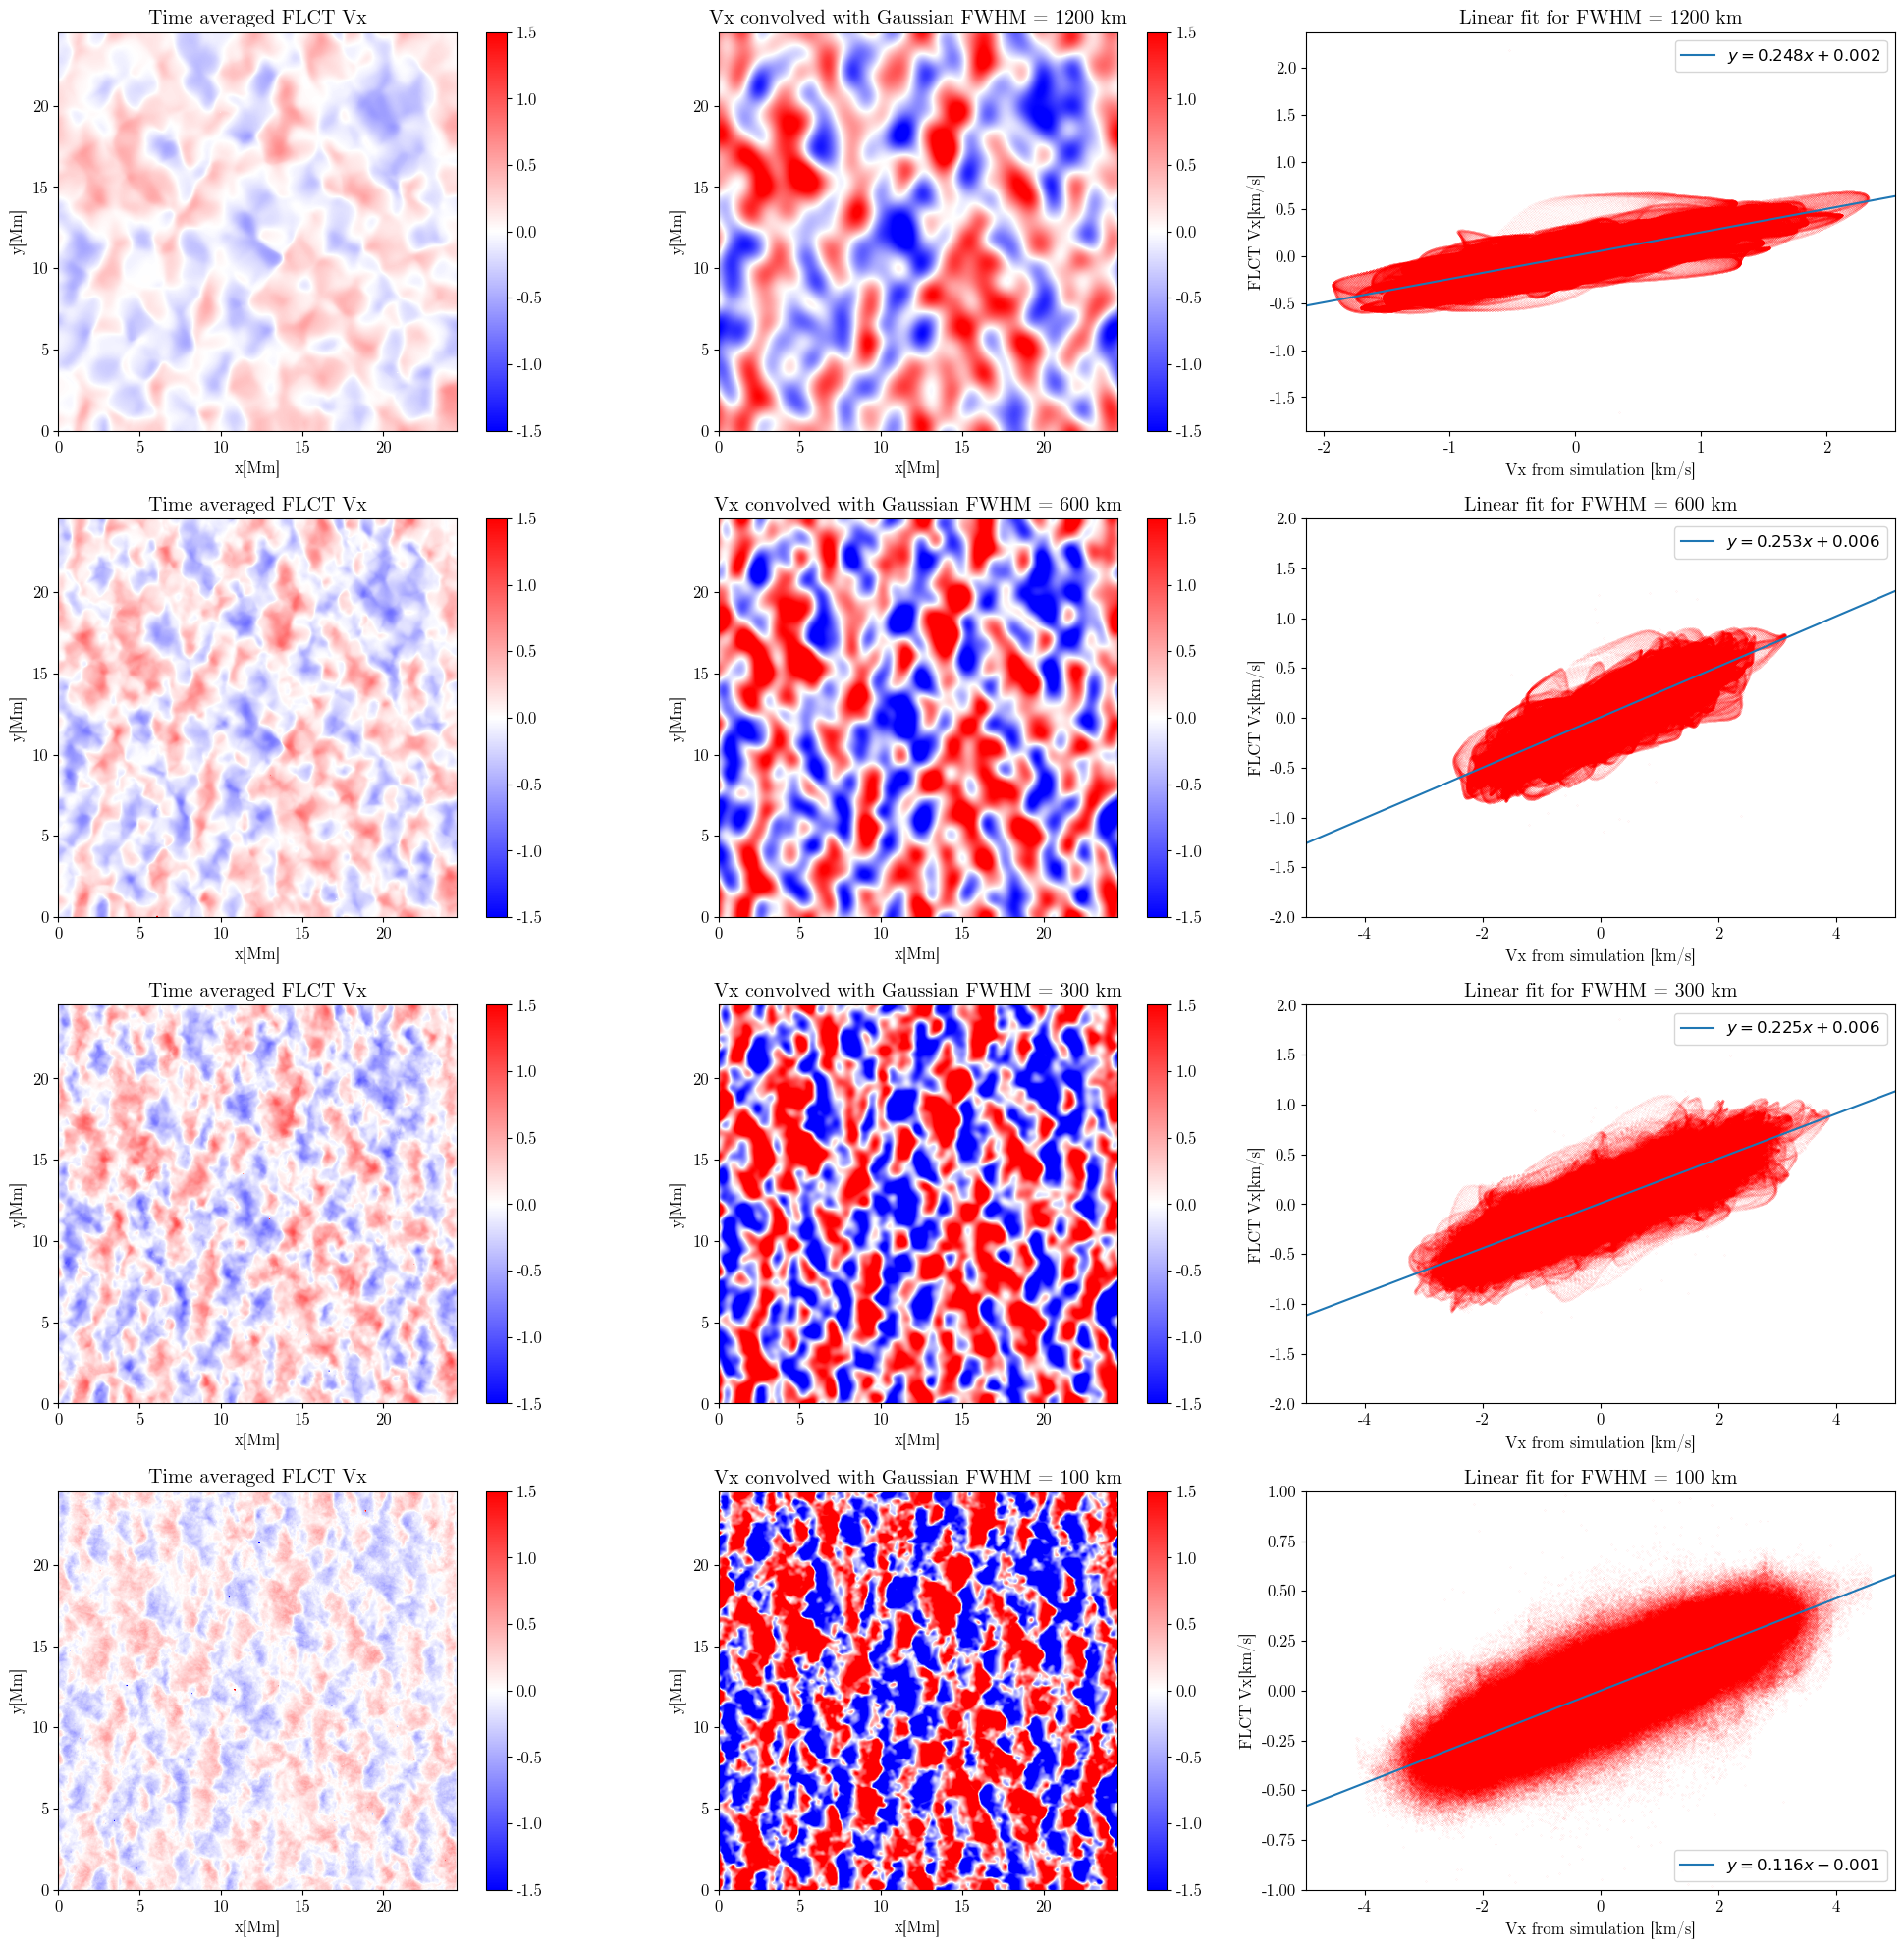

In [40]:
fig = plt.figure(figsize = (20,20))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
ax1 = plt.subplot2grid((4,3), (0,0))
ax1.set_title("Time averaged FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_FLCT_Bz1200[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

ax2 = plt.subplot2grid((4,3), (0,1))
ax2.set_title("Vx convolved with Gaussian FWHM = 1200 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

ax3 = plt.subplot2grid((4,3), (0,2))
ax3.set_title("Linear fit for FWHM = 1200 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx_filtered35.flatten(), Vx_FLCT_Bz1200.flatten(), s = 0.001, color="red")
m1, b1, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_Bz1200.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
plt.legend()

ax4 = plt.subplot2grid((4,3), (1,0))
ax4.set_title("Time averaged FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_FLCT_Bz600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

ax5 = plt.subplot2grid((4,3), (1,1))
ax5.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

ax6 = plt.subplot2grid((4,3), (1,2))
ax6.set_title("Linear fit for FWHM = 600 km")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.set_xlim(-5,5)
ax6.set_ylim(-2,2)
ax6.scatter(Vx_filtered22.flatten(), Vx_FLCT_Bz600.flatten(), s = 0.001, color="red")
m2, b2, *_ = linregress(Vx_filtered22.flatten(), Vx_FLCT_Bz600.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'$y = {m2:.3f}x {b2:+.3f}$')
plt.legend()

ax7 = plt.subplot2grid((4,3), (2,0))
ax7.set_title("Time averaged FLCT Vx")
ax7.set_xlabel("x[Mm]")
ax7.set_ylabel("y[Mm]")
im7 = ax7.imshow(Vx_FLCT_Bz300[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im7)

ax8 = plt.subplot2grid((4,3), (2,1))
ax8.set_title("Vx convolved with Gaussian FWHM = 300 km")
ax8.set_xlabel("x[Mm]")
ax8.set_ylabel("y[Mm]")
im8 = ax8.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im8)

ax9 = plt.subplot2grid((4,3), (2,2))
ax9.set_title("Linear fit for FWHM = 300 km")                                
ax9.set_ylabel("FLCT Vx[km/s]")
ax9.set_xlabel("Vx from simulation [km/s]")
ax9.scatter(Vx_filtered11.flatten(), Vx_FLCT_Bz300.flatten(), s = 0.001, color="red")
ax9.set_xlim(-5,5)
ax9.set_ylim(-2,2)
m3, b3, *_ = linregress(Vx_filtered11.flatten(), Vx_FLCT_Bz300.flatten())
ax9.axline(xy1=(0, b3), slope=m3, label=f'$y = {m3:.3f}x {b2:+.3f}$')
plt.legend()

ax10 = plt.subplot2grid((4,3), (3,0))
ax10.set_title("Time averaged FLCT Vx")
ax10.set_xlabel("x[Mm]")
ax10.set_ylabel("y[Mm]")
im10 = ax10.imshow(Vx_FLCT_Bz100[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im10)

ax11 = plt.subplot2grid((4,3), (3,1))
ax11.set_title("Vx convolved with Gaussian FWHM = 100 km")
ax11.set_xlabel("x[Mm]")
ax11.set_ylabel("y[Mm]")
im11 = ax11.imshow(Vx_filtered3[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im11)

ax12 = plt.subplot2grid((4,3), (3,2))
ax12.set_title("Linear fit for FWHM = 100 km")                                
ax12.set_ylabel("FLCT Vx[km/s]")
ax12.set_xlabel("Vx from simulation [km/s]")
ax12.set_xlim(-5,5)
ax12.set_ylim(-1,1)
ax12.scatter(Vx_filtered3.flatten(), Vx_FLCT_Bz100.flatten(), s = 0.001, color="red")
m4, b4, *_ = linregress(Vx_filtered3.flatten(), Vx_FLCT_Bz100.flatten())
ax12.axline(xy1=(0, b4), slope=m4, label=f'$y = {m4:.3f}x {b4:+.3f}$')
plt.legend()

fig.tight_layout()
plt.savefig("November_Bz.png", dpi = 300)

<h3>Correlation for $B_z$</h3>

In [41]:
rBz_1200x1 = pearsonr(Vx_Bz1200[0].flatten(), Vx[0].flatten()) 
print(rBz_1200x1)

PearsonRResult(statistic=0.36888280817271046, pvalue=0.0)


In [42]:
rBz_1200y1 = pearsonr(Vy_Bz1200[0].flatten(), Vy[0].flatten()) 
print(rBz_1200y1)

PearsonRResult(statistic=0.3229173027704916, pvalue=0.0)


In [44]:
rBz_1200x2 = pearsonr(Vx_FLCT_Bz1200.flatten(), Vx_mean_sim90.flatten())
print(rBz_1200x2)

PearsonRResult(statistic=0.5997309793773282, pvalue=0.0)


In [45]:
rBz_1200y2 = pearsonr(Vy_FLCT_Bz1200.flatten(), Vy_mean_sim90.flatten())
print(rBz_1200y2)

PearsonRResult(statistic=0.5800519523775038, pvalue=0.0)


In [46]:
rBz_1200x3 = pearsonr(Vx_FLCT_Bz1200.flatten(), Vx_filtered35.flatten())
print(rBz_1200x3)

PearsonRResult(statistic=0.8166219839802001, pvalue=0.0)


In [47]:
rBz_1200y3 = pearsonr(Vy_FLCT_Bz1200.flatten(), Vy_filtered35.flatten())
print(rBz_1200y3)

PearsonRResult(statistic=0.7910641198688368, pvalue=0.0)


In [48]:
rBz_600x1 = pearsonr(Vx_Bz600[0].flatten(), Vx[0].flatten()) 
print(rBz_600x1)

PearsonRResult(statistic=0.4543253657750186, pvalue=0.0)


In [49]:
rBz_600y1 = pearsonr(Vy_Bz600[0].flatten(), Vy[0].flatten()) 
print(rBz_600y1)

PearsonRResult(statistic=0.4123274977952557, pvalue=0.0)


In [50]:
rBz_600x2 = pearsonr(Vx_FLCT_Bz600.flatten(), Vx_mean_sim90.flatten())
print(rBz_600x2)

PearsonRResult(statistic=0.7070133637675358, pvalue=0.0)


In [51]:
rBz_600y2 = pearsonr(Vy_FLCT_Bz600.flatten(), Vy_mean_sim90.flatten())
print(rBz_600y2)

PearsonRResult(statistic=0.7085391879395744, pvalue=0.0)


In [52]:
rBz_600x3 = pearsonr(Vx_FLCT_Bz600.flatten(), Vx_filtered22.flatten())
print(rBz_600x3)

PearsonRResult(statistic=0.8254499888435033, pvalue=0.0)


In [53]:
rBz_600y3 = pearsonr(Vy_FLCT_Bz600.flatten(), Vy_filtered22.flatten())
print(rBz_600y3)

PearsonRResult(statistic=0.8239856571621816, pvalue=0.0)


In [54]:
rBz_300x1 = pearsonr(Vx_Bz300[0].flatten(), Vx[0].flatten()) 
print(rBz_300x1)

PearsonRResult(statistic=0.40249360241826104, pvalue=0.0)


In [55]:
rBz_300y1 = pearsonr(Vy_Bz300[0].flatten(), Vy[0].flatten()) 
print(rBz_300y1)

PearsonRResult(statistic=0.26606604770849324, pvalue=0.0)


In [56]:
rBz_300x2 = pearsonr(Vx_FLCT_Bz300.flatten(), Vx_mean_sim90.flatten())
print(rBz_300x2)

PearsonRResult(statistic=0.7843271720281224, pvalue=0.0)


In [57]:
rBz_300y2 = pearsonr(Vy_FLCT_Bz300.flatten(), Vy_mean_sim90.flatten())
print(rBz_300y2)

PearsonRResult(statistic=0.7813444393665973, pvalue=0.0)


In [58]:
rBz_300x3 = pearsonr(Vx_FLCT_Bz300.flatten(), Vx_filtered11.flatten())
print(rBz_300x3)

PearsonRResult(statistic=0.8413193032078066, pvalue=0.0)


In [59]:
rBz_300y3 = pearsonr(Vy_FLCT_Bz300.flatten(), Vy_filtered11.flatten())
print(rBz_300y3)

PearsonRResult(statistic=0.836975333144955, pvalue=0.0)


In [60]:
rBz_100x1 = pearsonr(Vx_Bz100[0].flatten(), Vx[0].flatten()) 
print(rBz_100x1)

PearsonRResult(statistic=0.21323360045853215, pvalue=0.0)


In [61]:
rBz_100y1 = pearsonr(Vy_Bz100[0].flatten(), Vy[0].flatten()) 
print(rBz_100y1)

PearsonRResult(statistic=0.26071535087226616, pvalue=0.0)


In [62]:
rBz_100x2 = pearsonr(Vx_FLCT_Bz100.flatten(), Vx_mean_sim90.flatten())
print(rBz_100x2)

PearsonRResult(statistic=0.09784637568440008, pvalue=0.0)


In [63]:
rBz_100y2 = pearsonr(Vy_FLCT_Bz100.flatten(), Vy_mean_sim90.flatten())
print(rBz_100y2)

PearsonRResult(statistic=0.10766494779389116, pvalue=0.0)


In [64]:
rBz_100x3 = pearsonr(Vx_FLCT_Bz100.flatten(), Vx_filtered3.flatten())
print(rBz_100x3)

PearsonRResult(statistic=0.09975533803852876, pvalue=0.0)


In [65]:
rBz_100y3 = pearsonr(Vy_FLCT_Bz100.flatten(), Vy_filtered3.flatten())
print(rBz_100y3)

PearsonRResult(statistic=0.10973423784233886, pvalue=0.0)
